## Crime Analytics: Visualization of Incident Reports
## Gerald Anyasodor Monday December 13, 2021

This report represents analysis of the criminal incident data from San Francisco Summer 2014. The dataset contains the criminal history from 01.June to 31.August 2014 with 28993 records.

Each row represent a criminal record including variables such as Category (crime type), Date, DayOfWeek and Time, PdDistrict(area), Address etc.

Objective and aim of the analysis is to answer the following questions:
1. For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During
what periods of the day are robberies most common?
2. For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center?
In what areas or neighborhoods are robberies or thefts most common?

## Visualisation Tool: used Python IDE with the following libraries: pandas, numpy, matplotlib and seaborn. The data visualization include histogram, table, time series and heat maps.

In [1]:
# -*- coding: utf-8 -*-
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
sns.set(font="monospace")
%matplotlib inline
# Initialize plot configuration

In [3]:
#load data: Will focus on the SF summer 2014 data
sf_summer = pd.read_csv('E:/Programming_Python-C/Data_Clean/crimeanalytics/sanfrancisco_incidents_summer_2014.csv')
st_summer = pd.read_csv('E:/Programming_Python-C/Data_Clean/crimeanalytics/seattle_incidents_summer_2014.csv')
sf_summer.describe()
#view data sample
sf_summer = sf_summer.drop(['IncidntNum','PdId'], axis=1)
sf_summer.columns = ['Category', 'Description', 'DayOfWeek', 'Date', 'Time', 'PdDistrict','Resolution', 'Address', 'Longitude', 'Latitude', 'Location']
print(sf_summer.head(2))

       Category         Description DayOfWeek        Date   Time PdDistrict  \
0         ARSON  ARSON OF A VEHICLE    Sunday  08/31/2014  23:50    BAYVIEW   
1  NON-CRIMINAL       LOST PROPERTY    Sunday  08/31/2014  23:45    MISSION   

  Resolution                    Address   Longitude   Latitude  \
0       NONE  LOOMIS ST / INDUSTRIAL ST -122.405647  37.738322   
1       NONE     400 Block of CASTRO ST -122.435012  37.761768   

                                Location  
0  (37.7383221869053, -122.405646994567)  
1  (37.7617677182954, -122.435012093789)  


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Starting the exploratory data analysis, I looked at the frequency distribution of crime categories depicted on the histogram below.

Histogram of criminal incident for data from San Francisco Summer 2014 illustrates that incidents LARCENY/THEFT to ROBBERY are most significant and occured most.

Text(0.5, 1.0, 'Bar chart of frequency by crime categories')

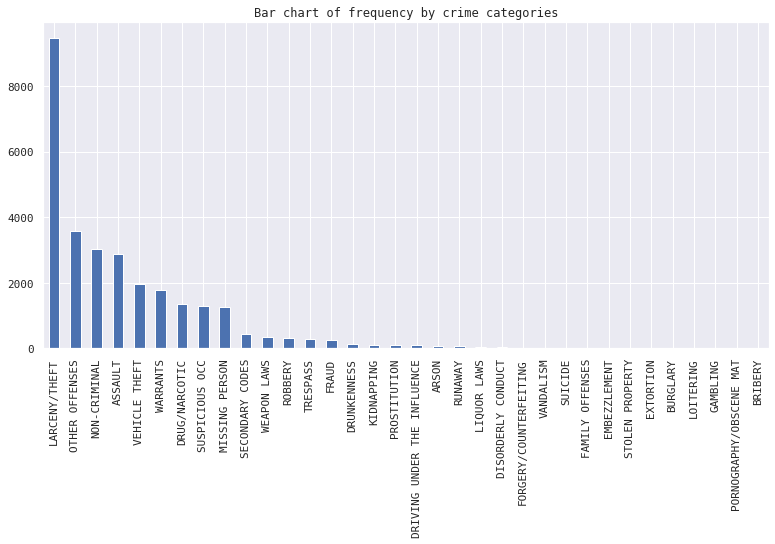

In [4]:
#Exploratory data analysis: review distribution of crime categories/ offense type
plt.figure(figsize= (13,6))
sf_summer['Category'].value_counts().plot(kind="bar")
plt.title("Bar chart of frequency by crime categories")

## Bar chart of frequency of the top 10 categories

Text(0.5, 1.0, 'Bar chart of frequency of the top 10 categories')

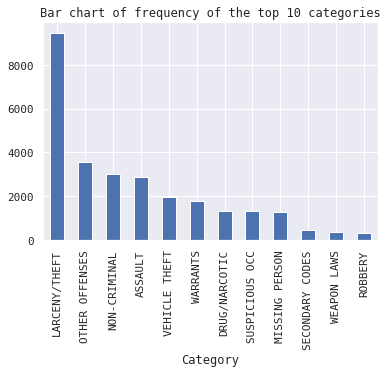

In [6]:
# Creaete a column for hour of the day
sf_summer['Hour'] = sf_summer['Time'].apply(lambda x: int(x[:2]) )
#Frequency table of incidents by hour of the day
Category_by_hour = sf_summer.groupby(['Category', 'Hour']).size().unstack()
# Replace NaN by 0
Category_by_hour = Category_by_hour.replace(np.NaN, 0. )
Category_by_hour['Total'] = sf_summer.groupby('Category').size()
Category_by_hour.sort_values(by= 'Total', inplace= True, ascending= False)

#visualize the incident frequency: 10 most significant
Category_by_hour['Total'].head(12).plot(kind="bar")
plt.title('Bar chart of frequency of the top 10 categories')

### Q1.: For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?

### Figure below depicts frequency of robberies incident during different periods or time of the day in hours in San Francisco Summer 2014.

### A1.: As shown in the figure, frequency of robberies incident fall to lowest in the time period from 6 AM – 7AM and peaks during the afternoon(11AM-1PM and evening hours (10PM – 12AM).

### The heat map below is in agreement with the plot.

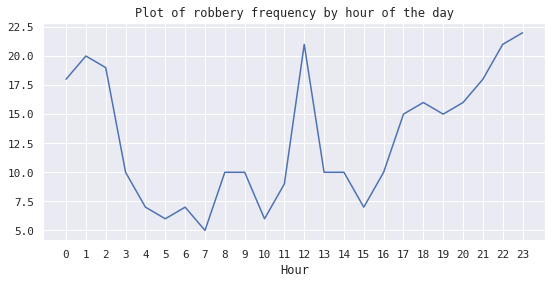

In [7]:
#Q: how does incidents vary by time of the day in different cities? which incidents are
#common in the evening? In the day periods, when do most robberies occcur?
#Question1: Visu plot using matplotlib: Robbery frequency by hour of the day
#Frequency table of incidents by hour of the day
Category_by_hour.drop('Total', axis=1).loc['ROBBERY'].plot(figsize= (9,4))
plt.xticks(range(24))
plt.title('Plot of robbery frequency by hour of the day')
plt.show()

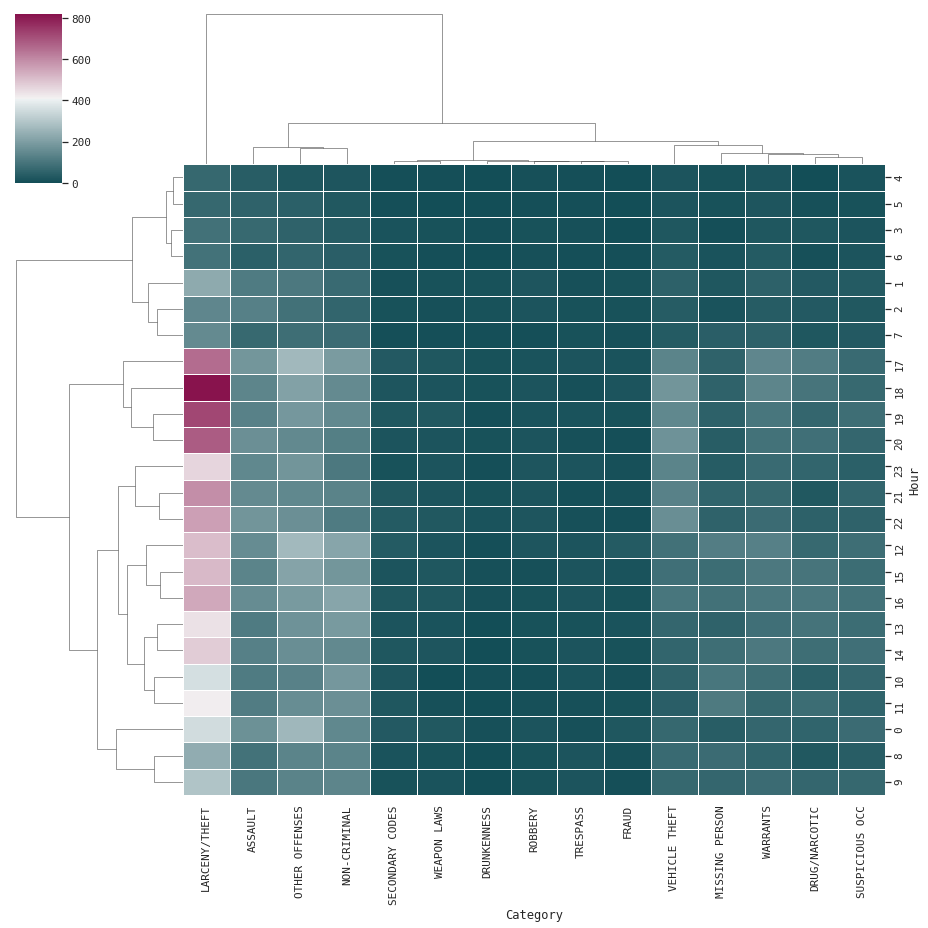

In [8]:
#visualize the incident frequency by category and hour using a heat map:
# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# Plot
sns.clustermap(Category_by_hour.drop('Total', axis=1).head(15).transpose()
, linewidths=.5, figsize=(13, 13), cmap=cmap)

### Q2.: For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?

### Table below presents list of areas or neighborhoods and frequency of incident categories in ascending order and the bar chart illustrates frequency of incidents within the neighborhood in San Francisco Summer 2014

### A2.: The bar chart and table, show that Larceny/theft incident represents the highest incident totalling to 9466 compared to other crime categories and occur most in the southern area or neighborhood with a share of of approximately 27.1%. Followed by central and northern neighborhoods with occurance of approximately 16.6 % and 15.8 % respectively. Heat map in below shows clearly the distribution of the incidents.

In [9]:
Category_by_hour.head(12)

Hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Total
Category,,,,,,,,,,,,,,,,,,,,,
LARCENY/THEFT,354.0,230.0,143.0,88.0,65.0,66.0,91.0,153.0,235.0,293.0,...,513.0,544.0,654.0,818.0,719.0,681.0,593.0,562.0,462.0,9466
OTHER OFFENSES,262.0,106.0,89.0,54.0,23.0,45.0,59.0,81.0,135.0,134.0,...,212.0,189.0,263.0,207.0,183.0,150.0,146.0,165.0,178.0,3567
NON-CRIMINAL,144.0,72.0,59.0,36.0,21.0,28.0,42.0,75.0,135.0,139.0,...,180.0,217.0,192.0,151.0,149.0,122.0,134.0,115.0,107.0,3023
ASSAULT,169.0,115.0,126.0,68.0,39.0,52.0,47.0,70.0,90.0,103.0,...,135.0,155.0,182.0,138.0,130.0,164.0,153.0,178.0,146.0,2882
VEHICLE THEFT,66.0,51.0,36.0,24.0,19.0,19.0,33.0,33.0,71.0,66.0,...,85.0,100.0,136.0,177.0,144.0,172.0,130.0,161.0,137.0,1966
WARRANTS,62.0,49.0,36.0,23.0,17.0,21.0,32.0,49.0,56.0,75.0,...,106.0,105.0,143.0,139.0,100.0,91.0,66.0,74.0,73.0,1782
DRUG/NARCOTIC,56.0,30.0,31.0,24.0,3.0,8.0,9.0,25.0,27.0,62.0,...,99.0,105.0,117.0,97.0,62.0,85.0,26.0,51.0,58.0,1345
SUSPICIOUS OCC,74.0,32.0,26.0,17.0,13.0,11.0,17.0,31.0,41.0,65.0,...,77.0,90.0,73.0,69.0,81.0,62.0,60.0,54.0,46.0,1300
MISSING PERSON,39.0,23.0,14.0,5.0,10.0,11.0,13.0,43.0,76.0,62.0,...,79.0,87.0,53.0,52.0,48.0,41.0,57.0,52.0,36.0,1266


Text(0.5, 1.0, 'Bar chart of crimes frequency by area or neighborhoods')

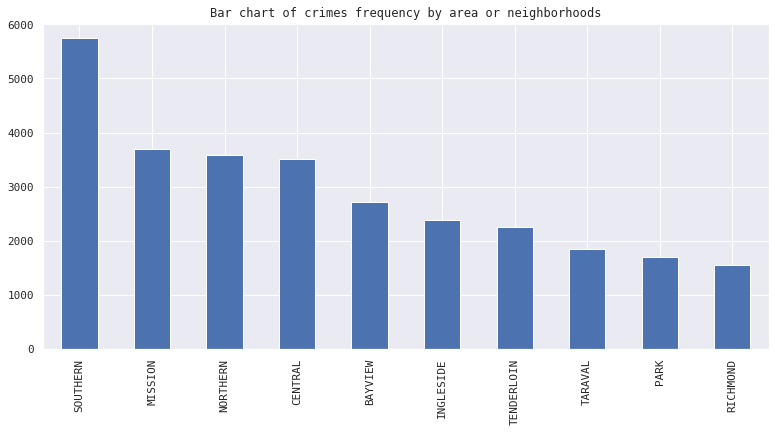

In [10]:
#Q: how does incidents vary by cities? which incidents are common in citycenter
#in areas or neighborhoods are robberies most common?
plt.figure(figsize= (13,6))
sf_summer['PdDistrict'].value_counts().plot(kind="bar")
plt.title("Bar chart of crimes frequency by area or neighborhoods")

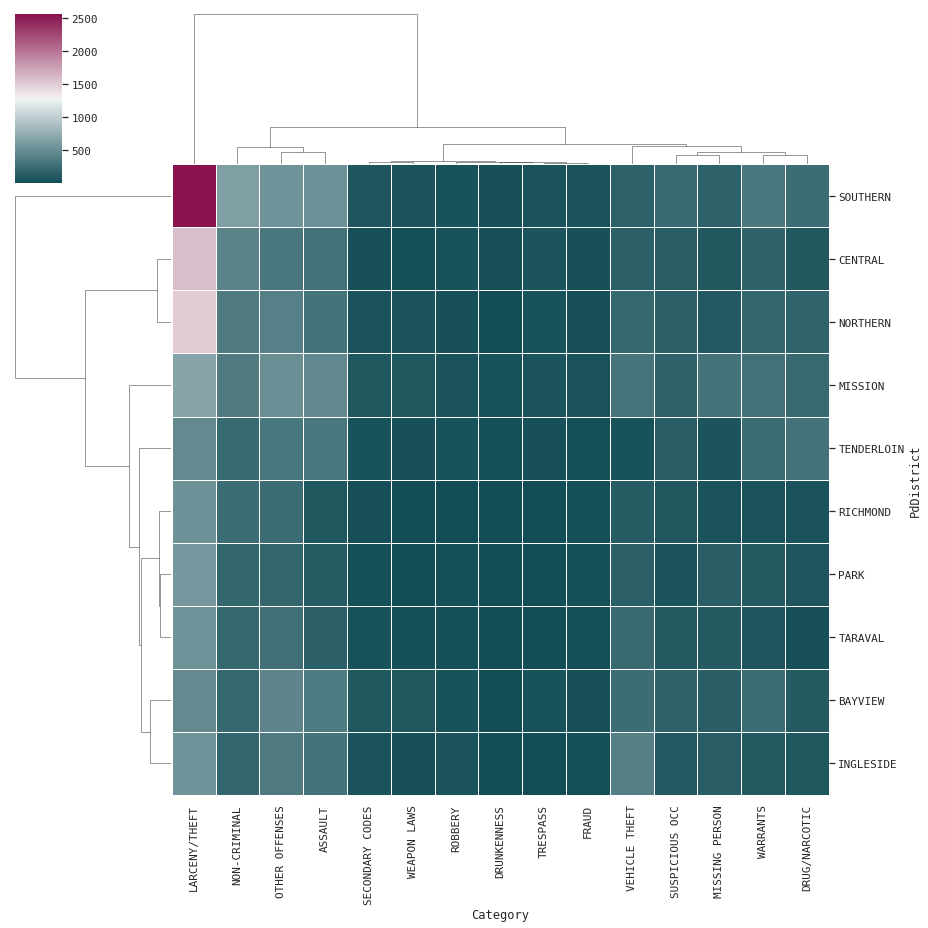

In [11]:
#visualize the incident frequency by category and area using a heat map:
Category_by_area = sf_summer.groupby(['Category', 'PdDistrict']).size().unstack()
# Replace NaN by 0
Category_by_area = Category_by_area.replace(np.NaN, 0. )
Category_by_area['Total'] = sf_summer.groupby('Category').size()
Category_by_area.sort_values(by= 'Total', inplace= True, ascending= False)
Category_by_area
# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# Plot
sns.clustermap(Category_by_area.drop('Total', axis=1).head(15).transpose()
, linewidths=.5, figsize=(13, 13), cmap=cmap)

### Figure is the Heat map of crime categories and neighborhoods relationship in San Francisco Summer 2014. It depicts that Larceny/theft, non-criminal and other offenses are most common in the southern, central and northern, while robberies appear to be equally common in all neighborhoods